# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

data_url = 'data/tennis.csv'
dataframe = pd.read_csv(data_url)
df = dataframe
df = df.dropna()
cols = ['player1 total points won','surface']
df = df[cols]

srf_list = df['surface'].unique()
for surf in srf_list:
    df[surf] = df['surface'] == surf
    df[surf] = df[surf].astype(int)
# drop outdoor hard for rank, as it's the most common
# and in dropping, will be treated as 'default'
df = df.drop('Outdoor: Hard', 1)

Y = df[['player1 total points won']]
X = df.drop(['player1 total points won','surface'], 1)
# X = df[srf_list[4]]
X = sm.add_constant(X)

mod = sm.OLS(Y, X).fit(cov_type='HC2')
print(df['surface'].value_counts())
for e in srf_list:
    print(e)
    print(df.loc[df['surface'] == e]['player1 total points won'].mean())
mod.summary()
# sm.graphics.plot_fit(mod, 1, vlines=False)

Outdoor: Hard     425
Outdoor: Clay     216
Indoor: Hard      194
Outdoor: Grass    124
Indoor: Carpet     57
Name: surface, dtype: int64
Indoor: Hard
77.08247422680412
Outdoor: Clay
88.08796296296296
Indoor: Carpet
83.2280701754386
Outdoor: Hard
87.81882352941176
Outdoor: Grass
98.69354838709677


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     16.93
Date:                      Fri, 22 Jan 2021   Prob (F-statistic):           1.91e-13
Time:                              23:45:25   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             87.8188      1.325     66.281      0.000      85.222      90.416
Indoor: Hard     -10.7363      1.816     -5.913      0.000     -14.295      -7.178
Outdoor: Clay      0.2691      2.458      0.109      0.913      -4.549       5.088
Indoor: Carpet    -4.5908      3.659     -1.255      0.210     -11.762       2.581
Outdoor: Grass    10.8747      3.254      3.342      0.001       4.497      17.253
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         5.04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [2]:
a = df.loc[df['surface'] == 'Outdoor: Grass']['player1 total points won']
b = df.loc[df['surface'] == 'Outdoor: Hard']['player1 total points won']

st.ttest_ind(a,b)

Ttest_indResult(statistic=3.7102702143688657, pvalue=0.00022820198577845895)

In [3]:
"""
Question 1 Answers
1. The model summary depicts Outdoor: Grass as Player1's most successful surface, having on average ~99 points won on it.
   The p-values for Outdoor: Clay and Indoor: Carpet suggest statistical insignificance. I attribute the pval of 
   Indoor: Carpet to the relatively small sample size. However for Outdoor: Clay I'm less certain, looking at a hist
   of point totals on Outdoor: Clay shows that clay is likely one of his least effective surfaces. Perhaps this is 
   related to the pval of Outdoor: Clay being so high.

2. The constant is necessary particularly in this model as it functions as the placeholder for 'Outdoor: Hard' which
   is dropped during cleanup for the sake of matrix rank.
   
3. See above.
   
"""

"\nQuestion 1 Answers\n1. The model summary depicts Outdoor: Grass as Player1's most successful surface, having on average ~99 points won on it.\n   The p-values for Outdoor: Clay and Indoor: Carpet suggest statistical insignificance. I attribute the pval of \n   Indoor: Carpet to the relatively small sample size. However for Outdoor: Clay I'm less certain, looking at a hist\n   of point totals on Outdoor: Clay shows that clay is likely one of his least effective surfaces. Perhaps this is \n   related to the pval of Outdoor: Clay being so high.\n\n2. The constant is necessary particularly in this model as it functions as the placeholder for 'Outdoor: Hard' which\n   is dropped during cleanup for the sake of matrix rank.\n   \n3. See above.\n   \n"

<AxesSubplot:xlabel='player1 total points won', ylabel='Count'>

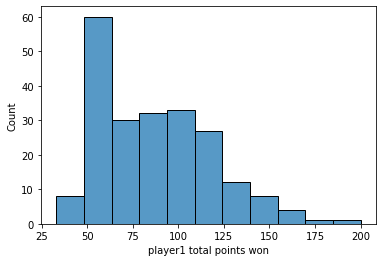

In [4]:
sns.histplot(data=df.loc[df['surface']=='Outdoor: Clay'], x=df.loc[df['surface']=='Outdoor: Clay']['player1 total points won'])

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [5]:
"""
Question 2 Answer:
1. See below for models.
   I attempted six different variants of the model.
   Each time reducing the # of features, but this did not improve the model.
   As a result, the initial model is the one I would select as best.
   
2. The most influential features (by coeff) are: Woman, Child, 1st Class, 2nd Class
   These results are consistent with the common understanding that women/children were prioritized, 
   after which clearly being a1st/2nd class passenger was the most important.
   
3. See below, I have no idea how to interpret this chart and would like assistance.
"""

'\nQuestion 2 Answer:\n1. See below for models.\n   I attempted six different variants of the model.\n   Each time reducing the # of features, but this did not improve the model.\n   As a result, the initial model is the one I would select as best.\n   \n2. The most influential features (by coeff) are: Woman, Child, 1st Class, 2nd Class\n   These results are consistent with the common understanding that women/children were prioritized, \n   after which clearly being a1st/2nd class passenger was the most important.\n   \n3. See below, I have no idea how to interpret this chart and would like assistance.\n'

<ipython-input-6-6d231691fd59>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_t['fare'] = df2_t['fare'] / len(df2_t)
C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 19, but rank is 18
  warnings.warn('covariance of constraints does not have full '


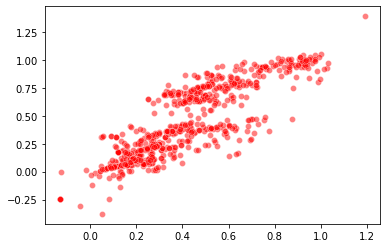

In [6]:
"""
1st model
    
aic = 759
bic = 854
r2 = 0.445
    
"""

data = sns.load_dataset('titanic')
df = data
df = df.drop(['survived','alive','embark_town','alone', 'adult_male', 'class', 'deck','sex'], 1)
df['embarked'] = df['embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton',
})

# fares which appear to be accumlated (from 3rd class)
accum_fares = {69.5500, 56.4958, 46.9000, 39.6875, 34.3750, 31.3875, 31.2750, 29.1250, 27.9000,25.466700, 24.150000, 23.450000,23.250000, 21.075,20.525000, 19.2583}

# for each val in accum_fares...
for e in accum_fares:
    # init df2 (df with 3rd class only)
    df2 = df.loc[df['pclass'] == 3]
    # trim so fare == e
    df2 = df2.loc[df2['fare'] == e]
    # filter by embarked for cases with multiple groups from dif towns
    for t in df2['embarked'].unique():
        df2_t = df2.loc[df2['embarked'] == t]
        # divide fare by # of people
        df2_t['fare'] = df2_t['fare'] / len(df2_t)
        # update df with df2 vals
        for index in df2_t.index:
            df.loc[index, 'fare'] = df2_t.loc[index, 'fare']
        

# for dummies, prefer to drop: southhampton, man
to_dummy = ['who','pclass', 'embarked']
to_poly = ['age','fare', 'sibsp','parch']
# build dummies

#hacked solution to replace nans and capture cols replaced with a dummy
df['age'] = df['age'].fillna(3.33333)
df['was_nan'] = (df.age == 3.33333).astype(int)
# 29.6 is ~avg age
df.age = df.age.replace(3.33333, 29.6)

dum = pd.get_dummies(data=df, columns=to_dummy)
x = dum.drop(['who_man', 'pclass_3', 'embarked_Southampton'], 1)

# build square/cube feat
for e in to_poly:
    x[e + '_2'] = x[e]**2
    x[e + '_3'] = x[e]**3

y = data.survived
x = sm.add_constant(x)
mod = sm.OLS(y,x).fit(cov_type='HC2')
mod.summary()

est = sm.OLS(y, x).fit_regularized(method='elastic_net', alpha=0.2, L1_wt=0.0)
yhat_net = est.predict(x) 
yhat = mod.predict(x)

sns.scatterplot(x=yhat_net,y=yhat,color='red',alpha=.5)
plt.show()

In [7]:
"""
2nd model (dropped: embarked)
aic = 757
bic = 844
r2 = 0.443
"""

data = sns.load_dataset('titanic')
df = data
df = df.drop(['survived','alive','embark_town','alone', 'adult_male', 'class', 'deck','sex'], 1)

# fares which appear to be accumlated (from 3rd class)
accum_fares = {69.5500, 56.4958, 46.9000, 39.6875, 34.3750, 31.3875, 31.2750, 29.1250, 27.9000,25.466700, 24.150000, 23.450000,23.250000, 21.075,20.525000, 19.2583}

# for each val in accum_fares...
for e in accum_fares:
    # init df2 (df with 3rd class only)
    df2 = df.loc[df['pclass'] == 3]
    # trim so fare == e
    df2 = df2.loc[df2['fare'] == e]
    # filter by embarked for cases with multiple groups from dif towns
    for t in df2['embarked'].unique():
        df2_t = df2.loc[df2['embarked'] == t]
        # divide fare by # of people
        df2_t['fare'] = df2_t['fare'] / len(df2_t)
        # update df with df2 vals
        for index in df2_t.index:
            df.loc[index, 'fare'] = df2_t.loc[index, 'fare']
            
df = df.drop('embarked', 1)

# for dummies, prefer to drop: southhampton, man
to_dummy = ['who','pclass']
to_poly = ['age', 'sibsp', 'fare', 'parch']


#hacked solution to replace nans and capture cols replaced with a dummy
df['age'] = df['age'].fillna(3.33333)
df['was_nan'] = (df.age == 3.33333).astype(int)
# 29.6 is ~avg age
df.age = df.age.replace(3.33333, 29.6)

# build dummies
dum = pd.get_dummies(data=df, columns=to_dummy)
x = dum.drop(['who_man', 'pclass_3'], 1)

# build square/cube feat
for e in to_poly:
    x[e + '_2'] = x[e]**2
    x[e + '_3'] = x[e]**3

y = data.survived
x = sm.add_constant(x)
mod = sm.OLS(y,x).fit(cov_type='HC2')
mod.summary()

<ipython-input-7-d1b8f2118442>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_t['fare'] = df2_t['fare'] / len(df2_t)
C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 17, but rank is 16
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     70.44
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          8.20e-145
Time:                        23:45:26   Log-Likelihood:                -360.89
No. Observations:                 891   AIC:                             757.8
Df Residuals:                     873   BIC:                             844.0
Df Model:                          17                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.142      1.420      0.155      -0.076       0.479
age           -0.0080      0.013     -0.619      0.536      -0.033       0.017
sibsp          0.0759      0.046      1.636      0.102      -0.015       0.167
parch          0.0023      0.077      0.031      0.976      -0.148       0.153
fare           0.0022      0.002      1.368      0.171      -0.001       0.005
was_nan        0.0023      0.035      0.067      0.947      -0.066       0.070
who_child      0.5315      0.102      5.203      0.000       0.331       0.732
who_woman      0.5632      0.032     17.502      0.000       0.500       0.626
pclass_1       0.2686      0.062      4.301      0.000       0.146       0.391
pclass_2       0.1194      0.033      3.566      0.000       0.054       0.185
age_2          0.0002      0.000      0.422      0.673      -0.001       0.001
age_3      -1.551e-06   3.66e-06     -0.423      0.672   -8.73e-06    5.63e-06
sibsp_2       -0.0864      0.022     -3.998      0.000      -0.129      -0.044
sibsp_3        0.0090      0.002      4.219      0.000       0.005       0.013
fare_2     -1.487e-05   8.76e-06     -1.697      0.090    -3.2e-05     2.3e-06
fare_3      2.456e-08   1.21e-08      2.023      0.043    7.63e-10    4.83e-08
parch_2       -0.0040      0.047     -0.085      0.932      -0.097       0.089
parch_3       -0.0022      0.006     -0.339      0.734      -0.015       0.010
==============================================================================
Omnibus:                       51.573   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.520
Skew:                           0.565   Prob(JB):                     4.38e-14
Kurtosis:                       3.616   Cond. No.                     1.07e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
"""
3rd model (dropped: embarked, fare)
aic = 757
bic = 829
r2 = 0.440
"""

data = sns.load_dataset('titanic')
df = data
#initial drops for cleanup
df = df.drop(['survived','alive','embark_town','alone', 'adult_male', 'class', 'deck','sex'], 1)
# interation drops
df = df.drop(['fare','embarked'], 1)

#hacked solution to replace nans and capture cols replaced with a dummy
df['age'] = df['age'].fillna(3.33333)
df['was_nan'] = (df.age == 3.33333).astype(int)
# 29.6 is ~avg age
df.age = df.age.replace(3.33333, 29.6)

# for dummies, prefer to drop: southhampton, man
to_dummy = ['who','pclass']
to_poly = ['age', 'sibsp', 'parch']

# build dummies
dum = pd.get_dummies(data=df, columns=to_dummy)
x = dum.drop(['who_man', 'pclass_3'], 1)

# build square/cube feat
for e in to_poly:
    x[e + '_2'] = x[e]**2
    x[e + '_3'] = x[e]**3

y = data.survived
x = sm.add_constant(x)
mod = sm.OLS(y,x).fit(cov_type='HC2')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     78.69
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.89e-144
Time:                        23:45:26   Log-Likelihood:                -363.85
No. Observations:                 891   AIC:                             757.7
Df Residuals:                     876   BIC:                             829.6
Df Model:                          14                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2096      0.142      1.472      0.141      -0.069       0.489
age           -0.0075      0.013     -0.584      0.559      -0.033       0.018
sibsp          0.0915      0.044      2.076      0.038       0.005       0.178
parch          0.0188      0.077      0.244      0.807      -0.132       0.170
was_nan       -0.0027      0.035     -0.076      0.939      -0.071       0.066
who_child      0.5394      0.102      5.289      0.000       0.340       0.739
who_woman      0.5663      0.031     18.080      0.000       0.505       0.628
pclass_1       0.3193      0.037      8.737      0.000       0.248       0.391
pclass_2       0.1336      0.032      4.205      0.000       0.071       0.196
age_2          0.0002      0.000      0.414      0.679      -0.001       0.001
age_3      -1.606e-06   3.66e-06     -0.439      0.661   -8.78e-06    5.57e-06
sibsp_2       -0.0942      0.020     -4.597      0.000      -0.134      -0.054
sibsp_3        0.0098      0.002      4.787      0.000       0.006       0.014
parch_2       -0.0140      0.048     -0.295      0.768      -0.107       0.079
parch_3       -0.0010      0.006     -0.154      0.878      -0.014       0.012
==============================================================================
Omnibus:                       48.967   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.910
Skew:                           0.549   Prob(JB):                     2.66e-13
Kurtosis:                       3.597   Cond. No.                     9.39e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
"""
4th model (dropped: embarked, fare, parch)
aic = 761
bic = 818
r2 = 0.434
"""

data = sns.load_dataset('titanic')
df = data
#initial drops for cleanup
df = df.drop(['survived','alive','embark_town','alone', 'adult_male', 'class', 'deck','sex'], 1)
# interation drops
df = df.drop(['parch','fare','embarked'], 1)


# for dummies, prefer to drop: southhampton, man
to_dummy = ['who','pclass']
to_poly = ['sibsp','age']

#hacked solution to replace nans and capture cols replaced with a dummy
df['age'] = df['age'].fillna(3.33333)
df['was_nan'] = (df.age == 3.33333).astype(int)
# 29.6 is ~avg age
df.age = df.age.replace(3.33333, 29.6)

# build dummies
dum = pd.get_dummies(data=df, columns=to_dummy)
x = dum.drop(['who_man', 'pclass_3'], 1)

# build square/cube feat
for e in to_poly:
    x[e + '_2'] = x[e]**2
    x[e + '_3'] = x[e]**3

y = data.survived
x = sm.add_constant(x)
mod = sm.OLS(y,x).fit(cov_type='HC2')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     96.80
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          3.44e-143
Time:                        23:45:26   Log-Likelihood:                -368.60
No. Observations:                 891   AIC:                             761.2
Df Residuals:                     879   BIC:                             818.7
Df Model:                          11                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2144      0.140      1.534      0.125      -0.060       0.488
age           -0.0073      0.013     -0.577      0.564      -0.032       0.017
sibsp          0.0797      0.044      1.812      0.070      -0.006       0.166
was_nan        0.0054      0.035      0.154      0.878      -0.063       0.074
who_child      0.5277      0.100      5.251      0.000       0.331       0.725
who_woman      0.5549      0.031     17.933      0.000       0.494       0.616
pclass_1       0.3326      0.036      9.169      0.000       0.261       0.404
pclass_2       0.1450      0.031      4.609      0.000       0.083       0.207
sibsp_2       -0.0901      0.020     -4.400      0.000      -0.130      -0.050
sibsp_3        0.0094      0.002      4.618      0.000       0.005       0.013
age_2          0.0001      0.000      0.339      0.735      -0.001       0.001
age_3      -1.221e-06   3.56e-06     -0.343      0.732    -8.2e-06    5.76e-06
==============================================================================
Omnibus:                       46.321   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.800
Skew:                           0.538   Prob(JB):                     2.08e-12
Kurtosis:                       3.541   Cond. No.                     9.33e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 9.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
"""
5th model (dropped: embarked, fare, parch, age)
aic = 761
bic = 799
r2 = 0.429
"""

data = sns.load_dataset('titanic')
df = data
#initial drops for cleanup
df = df.drop(['survived','alive','embark_town','alone', 'adult_male', 'class', 'deck','sex'], 1)
# interation drops
df = df.drop(['parch','fare','embarked', 'age'], 1)


# for dummies, prefer to drop: southhampton, man
to_dummy = ['who','pclass']
to_poly = ['sibsp']

# build dummies
dum = pd.get_dummies(data=df, columns=to_dummy)
x = dum.drop(['who_man', 'pclass_3'], 1)

# build square/cube feat
for e in to_poly:
    x[e + '_2'] = x[e]**2
    x[e + '_3'] = x[e]**3

y = data.survived
x = sm.add_constant(x)
mod = sm.OLS(y,x).fit(cov_type='HC2')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     146.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.90e-143
Time:                        23:45:26   Log-Likelihood:                -372.63
No. Observations:                 891   AIC:                             761.3
Df Residuals:                     883   BIC:                             799.6
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0798      0.018      4.336      0.000       0.044       0.116
sibsp          0.0808      0.044      1.836      0.066      -0.005       0.167
who_child      0.6251      0.051     12.157      0.000       0.524       0.726
who_woman      0.5620      0.031     18.319      0.000       0.502       0.622
pclass_1       0.3028      0.034      8.795      0.000       0.235       0.370
pclass_2       0.1338      0.030      4.448      0.000       0.075       0.193
sibsp_2       -0.0897      0.021     -4.339      0.000      -0.130      -0.049
sibsp_3        0.0093      0.002      4.533      0.000       0.005       0.013
==============================================================================
Omnibus:                       44.190   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.973
Skew:                           0.524   Prob(JB):                     8.54e-12
Kurtosis:                       3.526   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [11]:
"""
6th model (dropped: embarked, fare, parch, age, sibsp, poly)
aic = 806
bic = 830
r2 = 0.395
"""

data = sns.load_dataset('titanic')
df = data
#initial drops for cleanup
df = df.drop(['survived','alive','embark_town','alone', 'adult_male', 'class', 'deck','sex'], 1)
# interation drops
df = df.drop(['parch','fare','embarked', 'age','sibsp'], 1)


# for dummies, prefer to drop: southhampton, man
to_dummy = ['who','pclass']

# build dummies
dum = pd.get_dummies(data=df, columns=to_dummy)
x = dum.drop(['who_man', 'pclass_3'], 1)

y = data.survived
x = sm.add_constant(x)
mod = sm.OLS(y,x).fit(cov_type='HC2')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     242.6
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.13e-140
Time:                        23:45:26   Log-Likelihood:                -398.31
No. Observations:                 891   AIC:                             806.6
Df Residuals:                     886   BIC:                             830.6
Df Model:                           4                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0605      0.018      3.426      0.001       0.026       0.095
who_child      0.4677      0.053      8.880      0.000       0.364       0.571
who_woman      0.5453      0.030     17.956      0.000       0.486       0.605
pclass_1       0.3264      0.034      9.642      0.000       0.260       0.393
pclass_2       0.1684      0.030      5.581      0.000       0.109       0.228
==============================================================================
Omnibus:                       34.129   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.081
Skew:                           0.493   Prob(JB):                     8.87e-09
Kurtosis:                       3.168   Cond. No.                         4.07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [13]:
"""
Question 3
1. I've borrowed heavily from Yuri's code here, with the addition of a loop 
   which attempts to identify the best feature to remove to improve the model
   
   Due to the slow speed at which my code executes, I'm runnning out of time to improve upon the model.
   
   I understand that I've perhap only partially completed the assignment, and will resubmit if necessary.
   
   Note: The model has a prob f-stat of 0, aka completely useless.
"""

data = pd.read_csv('data/house_price.csv')
df = data

fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

for e in fill_na:
    df[e] = df[e].fillna('NaN')

#I found while browsing that a good way to fill na is with the mean of the colums
 
df['LotFrontage'] = df['LotFrontage'].fillna(df.LotFrontage.mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df.GarageYrBlt.mean())
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int64')


#MasVnrArea fill with 0 cause i think if there is no value it means its = to 0 
df.MasVnrArea = df.MasVnrArea.fillna(0)

#dropping the last na
df = df.dropna()

In [21]:
# categorical features (to dummy)
categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities","LotConfig", "LandSlope","Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

# continous feature (to poly)
countinuous_feature = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

x = df.copy()

for col in x.columns: 
    if col in categorical_features:
        name = col + "_"
        x = x.join(pd.get_dummies(x[col], drop_first= True, prefix = name))
        x = x.drop(col, 1)

    elif col in countinuous_feature:
        x[col] = x[col].astype(int)
        name = col + "_2"
        x[name] = x[col] ** 2
        name = col + '_3'
        x[name] = x[col] ** 3

# for e in drop_columns:
#     print(e)
#     print(e in x.columns)
# 'SaleCondition__Partial' in x.columns, 'SaleCondition__Partial' in drop_columns

In [32]:
#first model 

# # log scale for sale price to get normal dist?
df['SalePrice_log'] = df['SalePrice'].apply(np.log)

# drop columns, determined by repeatedly running the loop below
drop_columns = ['SalePrice', 'Id', 'SaleCondition__Partial', 'SaleCondition__Normal', 'SaleCondition__Family', 'SaleCondition__Alloca', 'SaleCondition__AdjLand', 'SaleType__WD', 'SaleType__Oth']

for c in x.columns:
    if c in drop_columns:
        x = x.drop(c, 1)

y = df['SalePrice_log']
x = sm.add_constant(x)
est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

# # this loop attempts to determine the best feature to drop for the improvement of the model
# for c in x.columns:
#     new_x = x.drop(c, 1)
#     n_est = sm.OLS(y, new_x).fit(cov_type='HC2')
#     best = est.aic
#     best_dropped = ''
#     if n_est.aic < best:
#         best = n_est.aic
#         best_dropped = c
# print(best_dropped, best)

<ipython-input-32-730637f9c9ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice_log'] = df['SalePrice'].apply(np.log)
C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 319, but rank is 267
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5713.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:12:18   Log-Likelihood:                 1487.7
No. Observations:                1459   AIC:                            -2357.
Df Residuals:                    1150   BIC:                            -724.1
Df Model:                         308                                         
Covariance Type:                  HC2                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    14.1401      5.764      2.453      0.014       2.842      25.438
LotFrontage               0.0014      0.001      1.031      0.303      -0.001       0.004
LotArea                 3.42e-06   7.02e-07      4.875      0.000    2.04e-06    4.79e-06
YearBuilt                 0.0019      0.000      4.073      0.000       0.001       0.003
YearRemodAdd              0.0010      0.000      3.551      0.000       0.000       0.002
MasVnrArea            -5.168e-05    6.7e-05     -0.772      0.440      -0.000    7.96e-05
BsmtFinSF1             8.268e-05   7.75e-05      1.067      0.286   -6.91e-05       0.000
BsmtFinSF2             1.258e-05   8.33e-05      0.151      0.880      -0.000       0.000
BsmtUnfSF             -1.941e-05   5.45e-05     -0.356      0.722      -0.000    8.74e-05
TotalBsmtSF               0.0001   6.19e-05      1.939      0.052   -1.28e-06       0.000
1stFlrSF                  0.0002      0.000      1.162      0.245      -0.000       0.001
2ndFlrSF                  0.0001      0.000      0.684      0.494      -0.000       0.000
LowQualFinSF             -0.0003      0.001     -0.538      0.590      -0.001       0.001
GrLivArea                 0.0003      0.000      1.679      0.093   -5.48e-05       0.001
BsmtFullBath              0.0179      0.010      1.797      0.072      -0.002       0.037
BsmtHalfBath              0.0069      0.013      0.517      0.605      -0.019       0.033
FullBath                  0.0294      0.011      2.640      0.008       0.008       0.051
HalfBath                  0.0276      0.010      2.725      0.006       0.008       0.048
BedroomAbvGr             -0.0004      0.008     -0.056      0.956      -0.016       0.015
KitchenAbvGr             -0.0793      0.037     -2.149      0.032      -0.152      -0.007
TotRmsAbvGrd              0.0005      0.005      0.104      0.917      -0.009       0.010
Fireplaces                0.0242      0.011      2.238      0.025       0.003       0.045
GarageYrBlt               0.0002      0.000      0.467      0.640      -0.000       0.001
GarageCars                0.0287      0.010      2.778      0.005       0.008       0.049
GarageArea               -0.0001      0.000     -1.038      0.299      -0.000       0.000
WoodDeckSF             -1.37e-05      0.000     -0.127      0.899      -0.000       0.000
OpenPorchSF            8.972e-05      0.000      0.472      0.637      -0.000       0.000
EnclosedPorch             0.0006      0.001      1.290      0.197      -0.000       0.002
3SsnPorch              4.359e-05      0.001      0.049      0.961      -0.002       0.002
ScreenPorch               0.0010      0.000      2.187      0.029       0.000       0.002
PoolArea                 -0.0058      0.052     -0.112      0.911      -0.107       0.095
MiscVal                

In [31]:
best_dropped

''